## Importing libraries

In [18]:
import pandas as pd

## Loading Data

In [19]:
df = pd.read_csv(
    'country_height_gender.csv',
    index_col=['Country Name'],
    usecols=['Country Name', 'Male Height in Cm', 'Female Height in Cm'],
)

df.head()

,Male Height in Cm,Female Height in Cm
Country Name,,
Netherlands,183.78,170.36
Montenegro,183.30,169.96
Estonia,182.79,168.66
Bosnia and Herzegovina,182.47,167.47
Iceland,182.10,168.91


## Rename column

In [20]:
df.rename(columns={'Male Height in Cm': 'Male', 'Female Height in Cm': 'Female'},
          inplace=True)

In [21]:
df.head()

,Male,Female
Country Name,,
Netherlands,183.78,170.36
Montenegro,183.30,169.96
Estonia,182.79,168.66
Bosnia and Herzegovina,182.47,167.47
Iceland,182.10,168.91


## Random Country's height

In [22]:
random_height = df.sample(n=10)

random_height

,Male,Female
Country Name,,
Seychelles,175.90,162.47
Barbados,177.03,165.66
Burundi,167.34,155.08
Sri Lanka,168.07,155.88
Tajikistan,168.43,158.12
Greenland,173.84,161.40
Liberia,165.48,156.54
Bahrain,172.76,158.29
Paraguay,173.81,159.76


<AxesSubplot:xlabel='Country Name'>

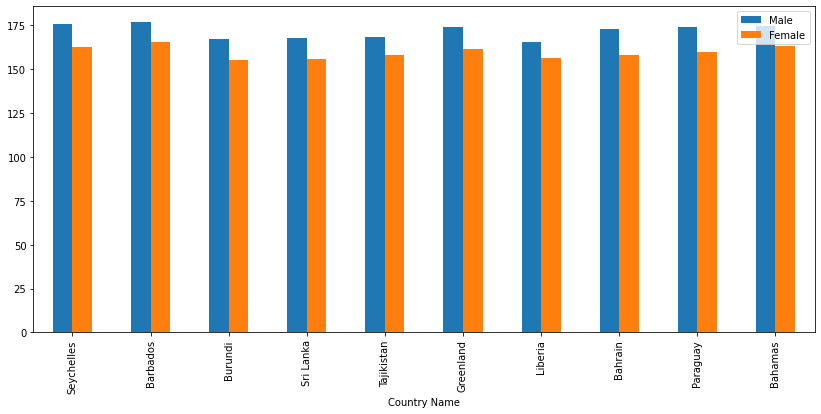

In [23]:
random_height.plot(kind='bar', figsize=(14, 6))

## Get ASEAN Country's Height

In [24]:
asean_country = df.loc[
    ['Indonesia', 'Malaysia', 'Brunei', 'Thailand', 'Philippines', 'Singapore', 'Vietnam', 'Laos', 'Cambodia',
     'Myanmar', 'Timor-Leste']]

asean_country

,Male,Female
Country Name,,
Indonesia,166.26,154.36
Malaysia,169.20,157.06
Brunei,166.31,154.90
Thailand,171.61,159.42
Philippines,165.23,154.14
Singapore,173.50,161.30
Vietnam,168.89,158.43
Laos,162.78,153.10
Cambodia,165.35,154.75


<AxesSubplot:xlabel='Country Name'>

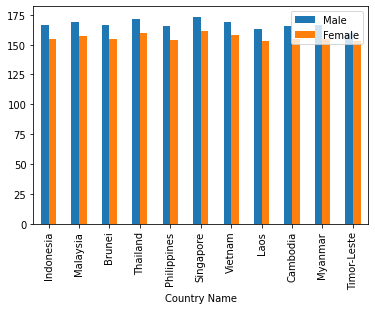

In [25]:
asean_country.plot(kind='bar')

<AxesSubplot:title={'center':'ASEAN Male height'}, xlabel='Country Name'>

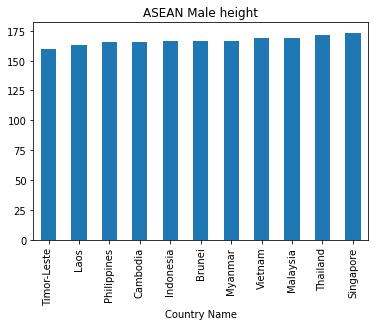

In [26]:
asean_country.sort_values(by=['Male'])['Male'].plot(kind='bar', title='ASEAN Male height')

<AxesSubplot:title={'center':'ASEAN Female height'}, xlabel='Country Name'>

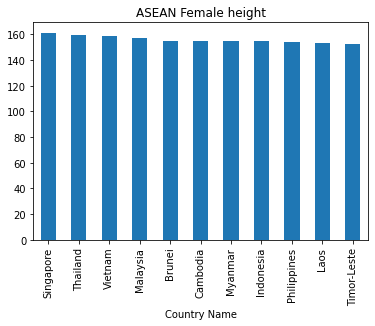

In [27]:
asean_country.sort_values(by=['Female'], ascending=False)['Female'].plot(kind='bar', title='ASEAN Female height')

### Tallest Male in ASEAN

In [28]:
asean_country.loc[asean_country['Male'] == asean_country['Male'].max(), 'Male']  # Male

Country Name
Singapore    173.5
Name: Male, dtype: float64

### Shortest Female in ASEAN

In [29]:
asean_country.loc[asean_country['Female'] == asean_country['Female'].min(), 'Female']  # Female

Country Name
Timor-Leste    152.71
Name: Female, dtype: float64

### Average Female & Male height in ASEAN

In [30]:
avg_male = asean_country['Male'].mean().round(2)
avg_female = asean_country['Female'].mean().round(2)

asean_avg = pd.DataFrame({
    'Gender': ['Female', 'Male'],
    'Height': [avg_female, avg_male],
}, columns=['Gender', 'Height'])

asean_avg

,Gender,Height
0,Female,155.90
1,Male,166.91


### Country with Female height above the average ASEAN height

In [58]:
above_average_female = asean_country.loc[asean_country['Female'] > avg_female, 'Female']

above_average_female.sort_values(ascending=False)

Country Name
Singapore    161.30
Thailand     159.42
Vietnam      158.43
Malaysia     157.06
Name: Female, dtype: float64

### Country with Male height below the average ASEAN height

In [60]:
below_average_male = asean_country.loc[asean_country['Male'] < avg_male, 'Male']

below_average_male.sort_values()

Country Name
Timor-Leste    160.13
Laos           162.78
Philippines    165.23
Cambodia       165.35
Indonesia      166.26
Brunei         166.31
Myanmar        166.70
Name: Male, dtype: float64

## Get Height of the country that starts from A-E

In [49]:
letters = ['a', 'b', 'c', 'd', 'e']

a_to_e_country = df[df.index.str.startswith(tuple(map(lambda x: str.upper(x), letters)))]

a_to_e_country.sort_values(by=['Country Name'])

pandas.core.frame.DataFrame

## Get the shortest Male & tallest Female in countries that starts with I

### Shortest Male

In [32]:
male_i_country = df.loc[df.index.str.startswith('I'), 'Male']

shortest_male_i_country = male_i_country[male_i_country == male_i_country.min()]

shortest_male_i_country

Country Name
Indonesia    166.26
Name: Male, dtype: float64

### Tallest Female

In [33]:
female_i_country = df.loc[df.index.str.startswith('I'), 'Female']

tallest_female_i_country = female_i_country[female_i_country == female_i_country.max()]

tallest_female_i_country

Country Name
Iceland    168.91
Name: Female, dtype: float64